In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000,high=90.000,size=1500)

lngs =np.random.uniform(low=-180.000,high=180.000,size=1500)

lat_lngs = zip(lats,lngs)

lat_lngs
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude tuple combinations.

for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-27.52716507630808 -177.897020708567
-49.55565967127517 100.17606910297803
21.73573330896437 10.603657410002398
-23.87460409707016 -78.12634551257402
68.6874573169786 -126.19813091252854
44.54187824609588 -139.0622437509921
43.98114980428292 40.203332605295174
8.978303640171205 96.98535944647648
50.64946937724082 -134.9324344111197
64.71266566426132 0.014983255594387401
-44.92466406706396 148.402313615629
12.619607666319695 -79.86944122407377
-58.535709197328 14.118560123508331
-73.33223523470853 123.03432009838144
-77.28465486743089 148.79357151099128
45.499420011452855 128.52048781586444
-43.7577674023467 125.3746871124925
-31.833052804130936 27.048123464624496
10.297442918123508 141.210254153944
-56.235057756077204 -48.80578441220001
-63.23281260485636 -79.9394192862508
-66.58536158573031 -168.66321571977483
5.414111062493845 -126.39934645657108
15.926808925653518 -26.849002913169528
77.21547847346221 -121.7771179251468
-9.80610759273685 90.48249283246378
89.86496875838571 144.69892

In [5]:
#6.1.5
from citipy import citipy


In [6]:


# Create a list for holding the cities.

cities =[]

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count.
len(cities)


622

In [7]:
import requests

requests.__version__

'2.26.0'

In [8]:
import requests

#import api key
from config import weather_api_key

# Starting URL for Weather Map API Call.

url ="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key



In [9]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.

city_data =[]

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count =1

set_count =1


# Loop through all the cities in the list.
#cities is a list we use enumerate
#if dataframe df.iterrows()

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #group our records in sets of 50
# we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    #we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+").
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | gat
Processing Record 4 of Set 1 | antofagasta
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | kamennomostskiy
Processing Record 8 of Set 1 | phangnga
Processing Record 9 of Set 1 | ketchikan
Processing Record 10 of Set 1 | brae
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | san andres
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | weihe
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | ilinge
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | mindelo
Processing Record 23 of Set 1 | bengkulu
Processing Rec

City not found. Skipping...
Processing Record 37 of Set 4 | san patricio
Processing Record 38 of Set 4 | upernavik
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | arkhangelsk
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | kampot
Processing Record 44 of Set 4 | marcona
City not found. Skipping...
Processing Record 45 of Set 4 | port blair
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | chulman
Processing Record 50 of Set 4 | barrow
Processing Record 1 of Set 5 | mecca
Processing Record 2 of Set 5 | morant bay
Processing Record 3 of Set 5 | kegayli
City not found. Skipping...
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | gravelbourg
Processing Record 6 of Set 5 | ituporanga
Processing Record 7 of Set 5 | santa isabel do rio negro
Processing Record 8 of

Processing Record 25 of Set 8 | sahrak
City not found. Skipping...
Processing Record 26 of Set 8 | mount gambier
Processing Record 27 of Set 8 | khonuu
City not found. Skipping...
Processing Record 28 of Set 8 | mayachnyy
Processing Record 29 of Set 8 | asti
Processing Record 30 of Set 8 | faanui
Processing Record 31 of Set 8 | la plata
Processing Record 32 of Set 8 | tiksi
Processing Record 33 of Set 8 | abha
Processing Record 34 of Set 8 | nemuro
Processing Record 35 of Set 8 | ljutomer
Processing Record 36 of Set 8 | twentynine palms
Processing Record 37 of Set 8 | itaqui
Processing Record 38 of Set 8 | wilmington
Processing Record 39 of Set 8 | agadir
Processing Record 40 of Set 8 | fortuna
Processing Record 41 of Set 8 | kigoma
Processing Record 42 of Set 8 | uvira
Processing Record 43 of Set 8 | cherskiy
Processing Record 44 of Set 8 | ozu
Processing Record 45 of Set 8 | yulara
Processing Record 46 of Set 8 | price
Processing Record 47 of Set 8 | nampa
Processing Record 48 of Set

Processing Record 13 of Set 12 | san luis
Processing Record 14 of Set 12 | avare
Processing Record 15 of Set 12 | piacabucu
Processing Record 16 of Set 12 | kokoda
Processing Record 17 of Set 12 | yaring
Processing Record 18 of Set 12 | idlib
Processing Record 19 of Set 12 | paamiut
Processing Record 20 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 21 of Set 12 | grand-lahou
Processing Record 22 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 23 of Set 12 | barabai
Processing Record 24 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 25 of Set 12 | kantunilkin
Processing Record 26 of Set 12 | anadyr
Processing Record 27 of Set 12 | klaksvik
Processing Record 28 of Set 12 | kenai
Processing Record 29 of Set 12 | visby
Processing Record 30 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 31 of Set 12 | redding
Processing Record 32 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Recor

In [11]:
len( city_data)

568

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df =pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.96,79,45,7.43,TO,2022-06-06 02:02:50
1,Busselton,-33.6500,115.3333,58.06,61,100,10.22,AU,2022-06-06 02:02:50
2,Gat,31.6100,34.7642,75.40,100,0,1.61,IL,2022-06-06 02:02:51
3,Antofagasta,-23.6500,-70.4000,58.28,84,10,3.24,CL,2022-06-06 02:02:51
4,Norman Wells,65.2820,-126.8329,49.73,52,100,6.51,CA,2022-06-06 02:02:51
5,Sitka,57.0531,-135.3300,60.69,67,75,8.05,US,2022-06-06 02:02:52
6,Kamennomostskiy,44.2983,40.1856,60.69,97,58,3.71,RU,2022-06-06 02:02:52
7,Phangnga,8.4509,98.5298,82.44,75,94,2.73,TH,2022-06-06 02:02:52
8,Ketchikan,55.3422,-131.6461,63.07,63,100,11.50,US,2022-06-06 02:02:53
9,Brae,60.3964,-1.3530,48.70,88,39,2.71,GB,2022-06-06 02:02:53


In [13]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-06-06 02:02:50,-21.2000,-175.2000,75.96,79,45,7.43
1,Busselton,AU,2022-06-06 02:02:50,-33.6500,115.3333,58.06,61,100,10.22
2,Gat,IL,2022-06-06 02:02:51,31.6100,34.7642,75.40,100,0,1.61
3,Antofagasta,CL,2022-06-06 02:02:51,-23.6500,-70.4000,58.28,84,10,3.24
4,Norman Wells,CA,2022-06-06 02:02:51,65.2820,-126.8329,49.73,52,100,6.51
...,...,...,...,...,...,...,...,...,...
563,Basna,IN,2022-06-06 02:18:12,21.2833,82.8167,93.42,30,57,4.94
564,Ouesso,CG,2022-06-06 02:18:12,1.6136,16.0517,70.32,96,100,1.05
565,Wakkanai,JP,2022-06-06 02:18:12,45.4094,141.6739,53.58,58,20,12.66
566,Tahe,CN,2022-06-06 02:18:13,52.3333,124.7333,75.06,31,97,3.36


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:

# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

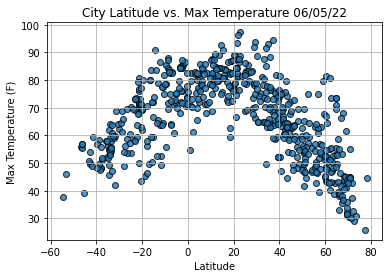

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

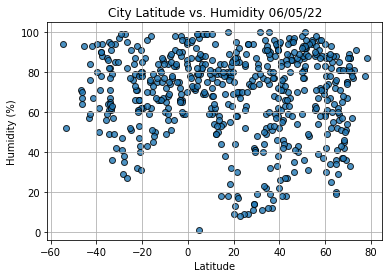

In [17]:
#6.3.2: Plot Latitude vs. Humidity



# Build the scatter plots for latitude vs. humidity.
#we changed the y value to humidity

plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()



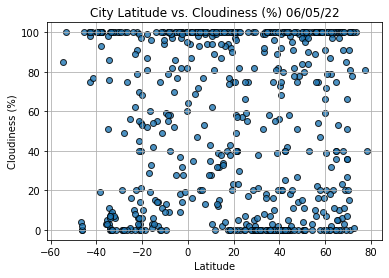

In [18]:
#6.3.3: Plot Latitude vs. Cloudiness
#change the y value to cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


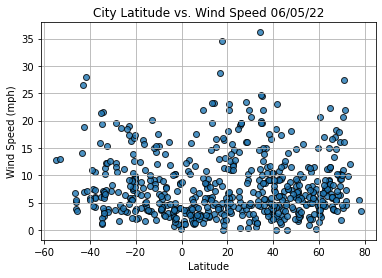

In [19]:
#6.3.4: Plot Latitude vs. Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
#6.4.2: Find the Correlation Between Latitude and Maximum Temperature

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

#In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates,
#and we will add a fifth parameter for the title, called, title. 

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [21]:
#The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array.
#returns values of index 13

index13 = city_data_df.loc[13]

index13

City                       Albany
Country                        US
Date          2022-06-06 02:00:02
Lat                       42.6001
Lng                      -73.9662
Max Temp                    61.92
Humidity                       66
Cloudiness                     40
Wind Speed                   4.43
Name: 13, dtype: object

In [22]:
#e can also filter a DataFrame based on a value of a row. 
#For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0,
#we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. 
#Executing this code will return either "True" or "False" for all the rows that meet these criteria.

city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
563     True
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [23]:
#using loc will return all values cities that meet the criteria
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0,
#we can use the loc method 

city_data_df.loc[(city_data_df["Lat"]>=0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Gat,IL,2022-06-06 02:02:51,31.6100,34.7642,75.40,100,0,1.61
4,Norman Wells,CA,2022-06-06 02:02:51,65.2820,-126.8329,49.73,52,100,6.51
5,Sitka,US,2022-06-06 02:02:52,57.0531,-135.3300,60.69,67,75,8.05
6,Kamennomostskiy,RU,2022-06-06 02:02:52,44.2983,40.1856,60.69,97,58,3.71
7,Phangnga,TH,2022-06-06 02:02:52,8.4509,98.5298,82.44,75,94,2.73
...,...,...,...,...,...,...,...,...,...
563,Basna,IN,2022-06-06 02:18:12,21.2833,82.8167,93.42,30,57,4.94
564,Ouesso,CG,2022-06-06 02:18:12,1.6136,16.0517,70.32,96,100,1.05
565,Wakkanai,JP,2022-06-06 02:18:12,45.4094,141.6739,53.58,58,20,12.66
566,Tahe,CN,2022-06-06 02:18:13,52.3333,124.7333,75.06,31,97,3.36


In [24]:
#add .head() to get the first 5 rows
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Gat,IL,2022-06-06 02:02:51,31.6100,34.7642,75.40,100,0,1.61
4,Norman Wells,CA,2022-06-06 02:02:51,65.2820,-126.8329,49.73,52,100,6.51
5,Sitka,US,2022-06-06 02:02:52,57.0531,-135.3300,60.69,67,75,8.05
6,Kamennomostskiy,RU,2022-06-06 02:02:52,44.2983,40.1856,60.69,97,58,3.71
7,Phangnga,TH,2022-06-06 02:02:52,8.4509,98.5298,82.44,75,94,2.73


In [25]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

southern_hemi_df =city_data_df.loc[(city_data_df["Lat"]<0)]



northern_hemi_df.head

<bound method NDFrame.head of                 City Country                 Date      Lat       Lng  \
2                Gat      IL  2022-06-06 02:02:51  31.6100   34.7642   
4       Norman Wells      CA  2022-06-06 02:02:51  65.2820 -126.8329   
5              Sitka      US  2022-06-06 02:02:52  57.0531 -135.3300   
6    Kamennomostskiy      RU  2022-06-06 02:02:52  44.2983   40.1856   
7           Phangnga      TH  2022-06-06 02:02:52   8.4509   98.5298   
..               ...     ...                  ...      ...       ...   
563            Basna      IN  2022-06-06 02:18:12  21.2833   82.8167   
564           Ouesso      CG  2022-06-06 02:18:12   1.6136   16.0517   
565         Wakkanai      JP  2022-06-06 02:18:12  45.4094  141.6739   
566             Tahe      CN  2022-06-06 02:18:13  52.3333  124.7333   
567     Fergus Falls      US  2022-06-06 02:15:30  46.2830  -96.0776   

     Max Temp  Humidity  Cloudiness  Wind Speed  
2       75.40       100           0        1.61  
4    

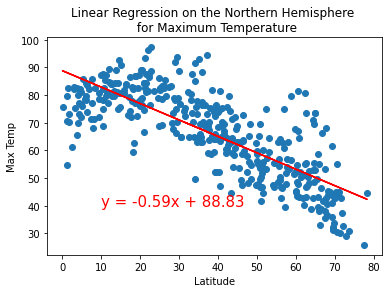

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

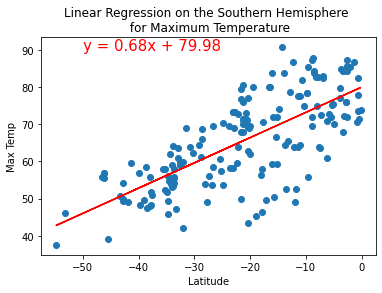

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       f'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))
#(-50,90) is the position of the formula

# Finding

The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

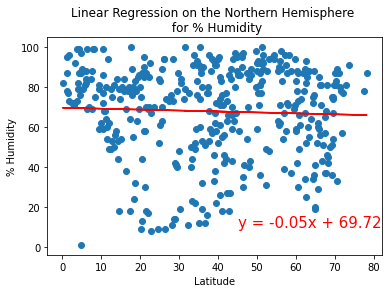

In [28]:
#6.4.3: Find the Correlation Between Latitude and Percent Humidity
# Linear regression on the Northern Hemisphere

x_values =northern_hemi_df["Lat"]

y_values =northern_hemi_df["Humidity"]

# Call the function.

plot_linear_regression(x_values, y_values, f'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity', (45,10))


0    -21.2000
1    -33.6500
3    -23.6500
10   -42.8794
12   -34.4187
Name: Lat, dtype: float64
0     79
1     61
3     84
10    76
12    49
Name: Humidity, dtype: int64


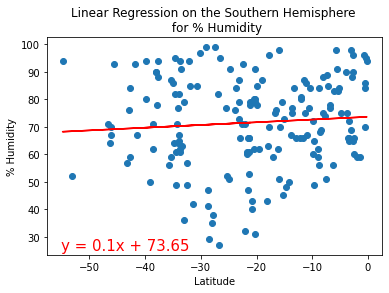

In [29]:
#Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
# Linear regression on the Southern Hemisphere

x_values =southern_hemi_df["Lat"]

y_values =southern_hemi_df["Humidity"]

print(x_values.head())
print(y_values.head())
# Call the function.

plot_linear_regression(x_values, y_values, f'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity',(-55,25)) #had to change the value of (-50,15) as 15 is not on the graph. Changed to (-55,25)

# Finding

The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

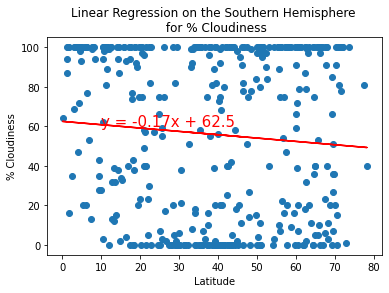

In [30]:
#6.4.4: Find the Correlation Between Latitude and Percent Cloudiness

x_values =northern_hemi_df["Lat"]

y_values =northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, f'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(10,60)) 

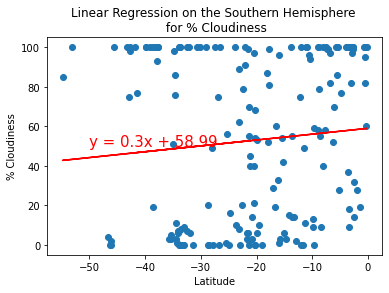

In [31]:

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, f'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50 ,50)) 

# Finding

The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. !

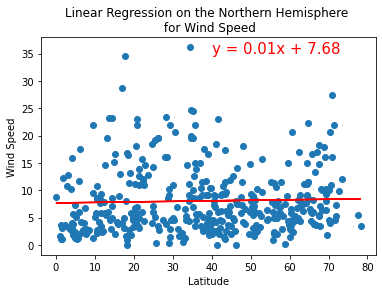

In [32]:
#6.4.5: Find the Correlation Between Latitude and Wind Speed

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       f'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

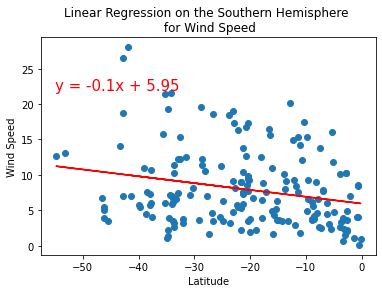

In [33]:
# Linear regression on the Southern Hemisphere

x_values =southern_hemi_df["Lat"]

y_values =southern_hemi_df["Wind Speed"]

# Call the function.

plot_linear_regression(x_values,y_values,f'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-55,22))

# Finding

The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots.